<a href="https://colab.research.google.com/github/SamuelRoblesArce/Machine_Learning/blob/main/ModeloDesercion_(SVM%2C_RandomForest%2C_Modelo_de_Bayes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio de Clasificación Modelo Deserción Universidad

Descripción de los datos:
* cant_semestres: cantidad de semestres estudiados hasta deserción
* sexo: F, M
* prom_notas_semestre: promedio de todos los cursos llevados por semestre
* prom_inasistencias: promedio de inasistencias por semestre
* cursos_reprobados: cursos reprobados en el semestre
* desercion: 1 si 0 no


**Objetivo**: predecir la deserción de los estudiantes, variable: **desercion**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Obtener Datos

In [2]:
url = "https://raw.githubusercontent.com/eduardool/MaestriaCienciaDatos/main/datasets/desercion.csv"
datos = pd.read_csv(url)

In [3]:
datos.head()

,cant_semestres,sexo,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion
0,0,F,9.332000,8.800000,3,0
1,0,F,11.606000,14.600000,1,0
2,0,M,15.052500,11.375000,0,0
3,0,M,9.261666,17.666666,4,0
4,0,M,12.985000,8.666667,2,0


In [4]:
datos = datos.dropna(axis='rows') #removiendo NaN
# almacena los nombres de las classes
classes = np.array(pd.unique(datos[datos.columns[-1]]), dtype=str)

In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   cant_semestres       4500 non-null   int64  
 1   sexo                 4500 non-null   object 
 2   prom_notas_semestre  4500 non-null   float64
 3   prom_inasistencias   4500 non-null   float64
 4   cursos_reprobados    4500 non-null   int64  
 5   desercion            4500 non-null   int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 211.1+ KB


## Análisis Exploratorio de Datos

<ipython-input-6-8fbf80b2e03a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='desercion',data=datos,palette='RdBu_r')


<Axes: xlabel='desercion', ylabel='count'>

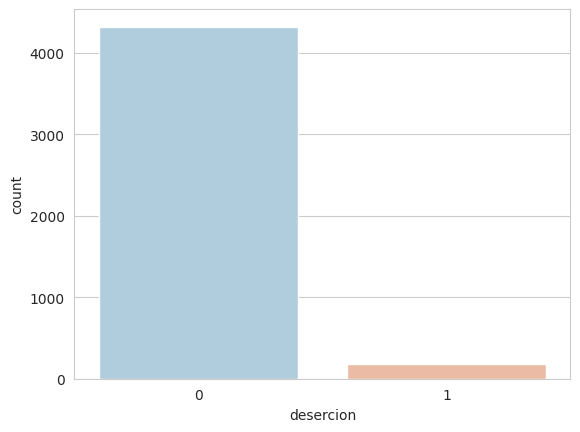

In [6]:
sns.set_style('whitegrid')
sns.countplot(x='desercion',data=datos,palette='RdBu_r')

<Axes: xlabel='desercion', ylabel='count'>

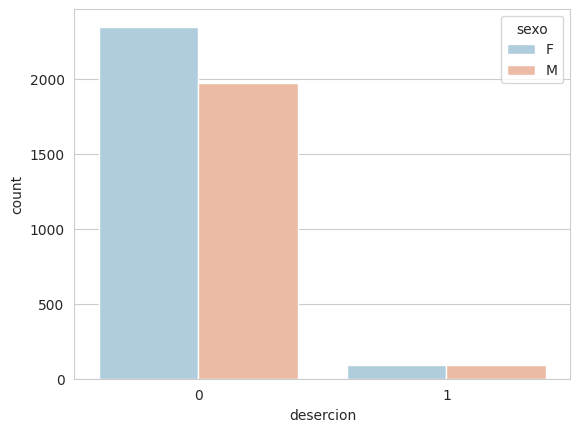

In [7]:
sns.set_style('whitegrid')
sns.countplot(x='desercion',hue='sexo',data=datos,palette='RdBu_r')

**Hacer más análisis exploratorio**

### Separar los datos

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
datos.columns

Index(['cant_semestres', 'sexo', 'prom_notas_semestre', 'prom_inasistencias',
       'cursos_reprobados', 'desercion'],
      dtype='object')

**Transformación de Variables Categóricas**

In [10]:
carac_cat = ['sexo']
datos = pd.get_dummies(datos,columns=carac_cat,drop_first=True)

#sexo = pd.get_dummies(datos['sexo'],drop_first=True)
#datos.drop(['sexo'],axis=1,inplace=True)
#datos = pd.concat([datos,sexo],axis=1)

In [11]:
datos.head()

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,desercion,sexo_M
0,0,9.332000,8.800000,3,0,False
1,0,11.606000,14.600000,1,0,False
2,0,15.052500,11.375000,0,0,True
3,0,9.261666,17.666666,4,0,True
4,0,12.985000,8.666667,2,0,True


In [12]:
X = datos[['cant_semestres', 'prom_notas_semestre', 'prom_inasistencias','cursos_reprobados', 'sexo_M']] #
y = datos['desercion']

In [13]:
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba  = train_test_split(X, y, test_size=0.1, random_state=42)

# Selección de Clasificadores con Cross Validation


## 1. SVM

In [14]:
from sklearn.svm import SVC
clasificador_SVM = SVC(random_state=42)


## Cross Validation - SVM

Cross Validation: 5 folds
![texto alternativo](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [15]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clasificador_SVM, X_entrenamiento,y_entrenamiento, cv=5, scoring='f1_macro') # validación cruzada de 5 folds
print("F1 promedio de %0.2f y desviación estandar de  %0.2f" % (scores.mean(), scores.std()))


F1 promedio de 0.80 y desviación estandar de  0.03


## 2. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
clasificador_rf = RandomForestClassifier(random_state=42)

## Cross Validation - RandomForest


In [17]:
scores = cross_val_score(clasificador_rf, X_entrenamiento,y_entrenamiento, cv=5, scoring='f1_macro') # validación cruzada de 5 folds
print("F1 promedio de %0.2f y desviación estandar de  %0.2f" % (scores.mean(), scores.std()))


F1 promedio de 0.89 y desviación estandar de  0.02


# 3. Modelo de Bayes

In [18]:
X

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados,sexo_M
0,0,9.332000,8.800000,3,False
1,0,11.606000,14.600000,1,False
2,0,15.052500,11.375000,0,True
3,0,9.261666,17.666666,4,True
4,0,12.985000,8.666667,2,True
...,...,...,...,...,...
4495,0,13.924286,7.428571,1,False
4496,0,13.777143,8.857142,0,True
4497,0,14.080000,4.142857,1,False
4498,0,11.045555,11.333333,5,False


In [19]:
X = X.drop(X.columns[-1], axis=1)
X

,cant_semestres,prom_notas_semestre,prom_inasistencias,cursos_reprobados
0,0,9.332000,8.800000,3
1,0,11.606000,14.600000,1
2,0,15.052500,11.375000,0
3,0,9.261666,17.666666,4
4,0,12.985000,8.666667,2
...,...,...,...,...
4495,0,13.924286,7.428571,1
4496,0,13.777143,8.857142,0
4497,0,14.080000,4.142857,1
4498,0,11.045555,11.333333,5


In [20]:
X = X.to_numpy()
nrow,ncol = X.shape
x= X[:,0:ncol]
x

array([[ 0.        ,  9.33199978,  8.80000019,  3.        ],
       [ 0.        , 11.60599995, 14.60000038,  1.        ],
       [ 0.        , 15.05249977, 11.375     ,  0.        ],
       ...,
       [ 0.        , 14.07999992,  4.14285707,  1.        ],
       [ 0.        , 11.04555511, 11.33333302,  5.        ],
       [ 0.        , 12.08600044, 14.60000038,  1.        ]])

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(x)
x = scaler.transform(x)

In [22]:
x

array([[-0.14670008, -1.75045996, -0.14033156,  1.42048804],
       [-0.14670008, -0.62676245,  0.81233928, -0.15084829],
       [-0.14670008,  1.07632595,  0.2826214 , -0.93651645],
       ...,
       [-0.14670008,  0.595765  , -0.90528401, -0.15084829],
       [-0.14670008, -0.90370634,  0.27577745,  2.99182438],
       [-0.14670008, -0.38957013,  0.81233928, -0.15084829]])

In [23]:
print('Dados transformados:')
print('Media: ', np.mean(x, axis = 0))
print('Desviación típica:', np.std(x, axis = 0))

Dados transformados:
Media:  [ 2.36847579e-18 -9.78969991e-17  1.08949886e-16  2.88164554e-17]
Desviación típica: [1. 1. 1. 1.]


In [24]:
x_train, x_test, y_train, y_test  = train_test_split(x, y, test_size=0.1, random_state=42)

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Modelo de Bayes
modelo_bayes = GaussianNB()

scores = cross_val_score(modelo_bayes, x_train, y_train, cv=5, scoring='f1_macro') # validación cruzada de 5 folds
print("F1 promedio de %0.2f y desviación estandar de  %0.2f" % (scores.mean(), scores.std()))

F1 promedio de 0.90 y desviación estandar de  0.02
